In [2]:
#Dependencies
import os
import requests
import pandas as pd
import numpy as np
import scipy as sp
import pprint as pp
import matplotlib.pyplot as plt

### Data Preparation/Cleaning

In [3]:
#Data sourced from https://www.imdb.com/interfaces/
inpath1 = os.path.join("Resources","IMDb","title.ratings.tsv")
inpath2 = os.path.join("Resources","IMDb","title.basics.tsv")
inpath3 = os.path.join("Resources","IMDb","title.akas.tsv")

ratings_df = pd.read_table(inpath1)
basics_df = pd.read_table(inpath2)
akas_df = pd.read_table(inpath3)

/Users/bilal/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/bilal/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1934
1,tt0000002,5.8,262
2,tt0000003,6.5,1759
3,tt0000004,5.6,177
4,tt0000005,6.2,2568


In [5]:
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
akas_df = akas_df.rename(columns={"titleId":"tconst"})

akas_df.head()


,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [7]:
movie_df = pd.merge(ratings_df, basics_df, on = "tconst")

movie_df = pd.merge(movie_df, akas_df, on = "tconst")


In [8]:
movie_df.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,5.7,1934,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,5.7,1934,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,5.7,1934,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,5.7,1934,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5.7,1934,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5,Карменсита,RU,\N,imdbDisplay,\N,0


In [9]:

movie_df = movie_df[["tconst","startYear", "averageRating", "numVotes", "language","title","primaryTitle","titleType","isAdult","genres","region"]]

#   Remove rows with empty column
movie_df = movie_df.loc[movie_df["language"]!="\\N"]

#   Remove rows with empty genre
movie_df = movie_df.loc[movie_df["genres"]!= "\\N"]

#   Remove rows with empty start year
movie_df = movie_df.loc[movie_df["startYear"]!="\\N"]
movie_df["startYear"] = movie_df["startYear"].astype(int)



recent_movies = movie_df.loc[movie_df["startYear"]>=2000]

#Reset Index
recent_movies = recent_movies.reset_index(drop = True)

recent_movies

,tconst,startYear,averageRating,numVotes,language,title,primaryTitle,titleType,isAdult,genres,region
0,tt0013274,2021,6.7,48,ru,История гражданской войны,Istoriya grazhdanskoy voyny,movie,0,Documentary,SUHH
1,tt0013274,2021,6.7,48,en,The History of the Civil War,Istoriya grazhdanskoy voyny,movie,0,Documentary,XWW
2,tt0035423,2001,6.4,85681,en,Kate & Leopold,Kate & Leopold,movie,0,"Comedy,Fantasy,Romance",ZA
3,tt0035423,2001,6.4,85681,bg,Кейт и Леополд,Kate & Leopold,movie,0,"Comedy,Fantasy,Romance",BG
4,tt0035423,2001,6.4,85681,ja,ニューヨークの恋人,Kate & Leopold,movie,0,"Comedy,Fantasy,Romance",JP
...,...,...,...,...,...,...,...,...,...,...,...
834213,tt9916766,2019,7.0,21,it,Episodio #10.15,Episode #10.15,tvEpisode,0,"Family,Game-Show,Reality-TV",IT
834214,tt9916766,2019,7.0,21,de,Folge #10.15,Episode #10.15,tvEpisode,0,"Family,Game-Show,Reality-TV",DE
834215,tt9916766,2019,7.0,21,pt,Episódio #10.15,Episode #10.15,tvEpisode,0,"Family,Game-Show,Reality-TV",PT
834216,tt9916766,2019,7.0,21,hi,एपिसोड #10.15,Episode #10.15,tvEpisode,0,"Family,Game-Show,Reality-TV",IN


In [10]:
recent_movies.count()

tconst           834218
startYear        834218
averageRating    834218
numVotes         834218
language         834218
title            834218
primaryTitle     834218
titleType        834218
isAdult          834218
genres           834218
region           834218
dtype: int64

In [11]:
#   Parse Genres column

# Store genres for each movie in list and delimit by comma
d1 = [x.split(",") for x in recent_movies["genres"]]

# Determine number of genre columns from max of list lengths
list_lens = [len(g) for g in d1]
highest_list = max(list_lens)
print(highest_list)

3


In [12]:
genre_dict = {}
init = True

for z in d1:

    if init == False:
        for x in range(0,highest_list):
            try:
                genre_dict[f"genre_{x+1}"].append(z[x])
            except:
                genre_dict[f"genre_{x+1}"].append("")
    else:
        for x in range(0,highest_list):
            try:
                genre_dict[f"genre_{x+1}"] = [z[x]]
            except Exception as e:
                genre_dict[f"genre_{x+1}"] = [""]

        init = False

parsed_genres = pd.DataFrame(genre_dict)

In [13]:
recent_movies = pd.merge(recent_movies,parsed_genres,right_index=True, left_index=True)
del recent_movies["genres"]


In [14]:
recent_movies.head()

,tconst,startYear,averageRating,numVotes,language,title,primaryTitle,titleType,isAdult,region,genre_1,genre_2,genre_3
0,tt0013274,2021,6.7,48,ru,История гражданской войны,Istoriya grazhdanskoy voyny,movie,0,SUHH,Documentary,,
1,tt0013274,2021,6.7,48,en,The History of the Civil War,Istoriya grazhdanskoy voyny,movie,0,XWW,Documentary,,
2,tt0035423,2001,6.4,85681,en,Kate & Leopold,Kate & Leopold,movie,0,ZA,Comedy,Fantasy,Romance
3,tt0035423,2001,6.4,85681,bg,Кейт и Леополд,Kate & Leopold,movie,0,BG,Comedy,Fantasy,Romance
4,tt0035423,2001,6.4,85681,ja,ニューヨークの恋人,Kate & Leopold,movie,0,JP,Comedy,Fantasy,Romance


In [15]:
outpath = os.path.join("output","IMDb.csv")
recent_movies.to_csv(outpath)

In [16]:
#filter movies_df for English movies
movies_en = recent_movies.loc[recent_movies["language"]=="en"]


outpath = os.path.join("output","IMDB_en.csv")
movies_en.to_csv(outpath)


In [17]:
movies_en = movies_en.drop_duplicates(subset = ["tconst","region"])

no_dup = movies_en.drop_duplicates(subset = "tconst")

del no_dup["region"]


In [18]:
no_dup

,tconst,startYear,averageRating,numVotes,language,title,primaryTitle,titleType,isAdult,genre_1,genre_2,genre_3
1,tt0013274,2021,6.7,48,en,The History of the Civil War,Istoriya grazhdanskoy voyny,movie,0,Documentary,,
2,tt0035423,2001,6.4,85681,en,Kate & Leopold,Kate & Leopold,movie,0,Comedy,Fantasy,Romance
11,tt0062336,2020,6.4,163,en,The Tango of the Widower and Its Distorting Mi...,The Tango of the Widower and Its Distorting Mi...,movie,0,Drama,,
15,tt0067626,2006,5.7,130,en,Before the Rally,Before the Rally,short,0,Documentary,Short,
16,tt0067683,2006,6.4,92,en,Workers '71: Nothing About Us Without Us,Workers '71: Nothing About Us Without Us,movie,0,Documentary,,
...,...,...,...,...,...,...,...,...,...,...,...,...
834191,tt9916170,2019,7.0,7,en,The Rehearsal,The Rehearsal,movie,0,Drama,,
834192,tt9916206,2019,2.9,31,en,Nojor,Nojor,tvSeries,0,Fantasy,,
834194,tt9916216,2014,8.5,11,en,Kalyanam Mudhal Kadhal Varai,Kalyanam Mudhal Kadhal Varai,tvSeries,0,Romance,,
834196,tt9916362,2020,6.4,5101,en,Coven,Coven,movie,0,Drama,History,


In [19]:
g1_df = no_dup[["tconst","genre_1"]]
g1_df = g1_df.rename(columns = {"genre_1":"genre"})

g2_df = no_dup[["tconst","genre_2"]].loc[no_dup[["tconst","genre_2"]]["genre_2"]!=""]
g2_df = g2_df.rename(columns={"genre_2":"genre"})

g3_df = no_dup[["tconst","genre_3"]].loc[no_dup[["tconst","genre_3"]]["genre_3"]!=""]
g3_df = g3_df.rename(columns= {"genre_3":"genre"})

combined_genres = g1_df.append(g2_df).append(g3_df)

combined_genres

,tconst,genre
1,tt0013274,Documentary
2,tt0035423,Comedy
11,tt0062336,Drama
15,tt0067626,Documentary
16,tt0067683,Documentary
...,...,...
833991,tt9907782,Mystery
834035,tt9909874,Short
834088,tt9910948,Fantasy
834178,tt9915872,Fantasy


In [20]:
m_en2 = no_dup[["tconst","startYear","averageRating","numVotes","language","title","primaryTitle","titleType","isAdult"]]
merged = pd.merge(m_en2,combined_genres, on = "tconst")

merged
# merged["region"].unique()

,tconst,startYear,averageRating,numVotes,language,title,primaryTitle,titleType,isAdult,genre
0,tt0013274,2021,6.7,48,en,The History of the Civil War,Istoriya grazhdanskoy voyny,movie,0,Documentary
1,tt0035423,2001,6.4,85681,en,Kate & Leopold,Kate & Leopold,movie,0,Comedy
2,tt0035423,2001,6.4,85681,en,Kate & Leopold,Kate & Leopold,movie,0,Fantasy
3,tt0035423,2001,6.4,85681,en,Kate & Leopold,Kate & Leopold,movie,0,Romance
4,tt0062336,2020,6.4,163,en,The Tango of the Widower and Its Distorting Mi...,The Tango of the Widower and Its Distorting Mi...,movie,0,Drama
...,...,...,...,...,...,...,...,...,...,...
214184,tt9916362,2020,6.4,5101,en,Coven,Coven,movie,0,Drama
214185,tt9916362,2020,6.4,5101,en,Coven,Coven,movie,0,History
214186,tt9916428,2019,3.8,14,en,The Secret of China,The Secret of China,movie,0,Adventure
214187,tt9916428,2019,3.8,14,en,The Secret of China,The Secret of China,movie,0,History


### Data Exploration

In [92]:
# merged.boxplot(column="averageRating", by = "genre")

In [94]:
mmedian = merged.groupby("genre").median().sort_values(by = ["numVotes","averageRating"], ascending = False)
top_genres_by_median = list(mmedian.head(10).index)

,startYear,averageRating,numVotes
genre,,,
Crime,2015.0,6.5,815.0
Action,2014.0,6.3,737.0
Mystery,2016.0,6.3,672.0
Adventure,2014.0,6.6,647.5
Thriller,2016.0,5.8,561.5
Biography,2015.0,7.0,530.0
Sci-Fi,2015.0,6.0,529.0
Horror,2015.0,5.2,471.5
Western,2017.0,6.0,398.0


In [95]:
mmean = merged.groupby("genre").mean().sort_values(by = ["numVotes","averageRating"], ascending = False)
top_genres_by_mean = list(mmean.head(10).index)

In [83]:

filter_highest_mean = []
filter_highest_median = []

for x in merged["genre"]:
    if x in top_genres_by_mean:
        filter_highest_mean.append(True)
    else:
        filter_highest_mean.append(False)

for x in merged["genre"]:
    if x in top_genres_by_median:
        filter_highest_median.append(True)
    else:
        filter_highest_median.append(False)




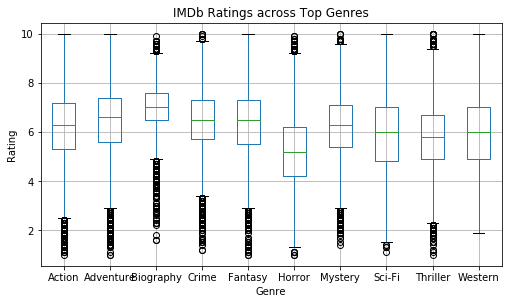

In [90]:
top_genres = merged.loc[filter_highest_mean]

g_plot = top_genres.boxplot( column = "averageRating",by = "genre", figsize= (8,4.5))
g_plot.set_title("IMDb Ratings across Top Genres")
g_plot.set_ylabel("Rating")
g_plot.set_xlabel("Genre")
plt.suptitle("")

plt.show()

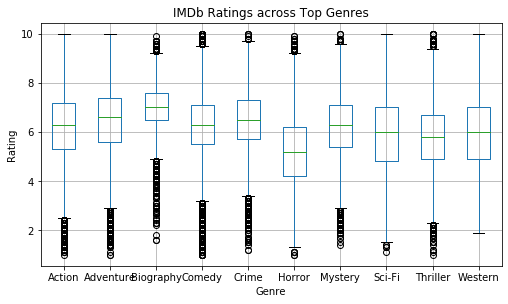

In [88]:
top_genres = merged.loc[filter_highest_median]

g_plot = top_genres.boxplot( column = "averageRating",by = "genre", figsize= (8,4.5))
g_plot.set_title("IMDb Ratings across Top Genres")
g_plot.set_ylabel("Rating")
g_plot.set_xlabel("Genre")
plt.suptitle("")

plt.show()

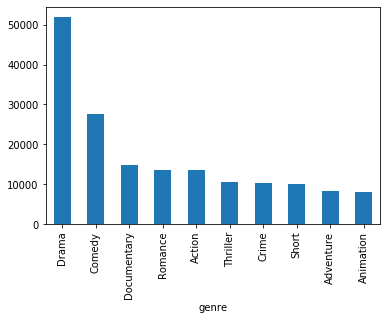

In [33]:
merged.groupby("genre").count()["title"].sort_values(ascending= False).head(10).plot(kind = "bar")